### Plot footprint

- Plot the footprint from tbt data from sixtracklib simulations.
- The tune is caclulated using NAFF.]
- If you need to use any of the sixtracklib modules you need to activate the following environment before you lunch jupyterlab.
source /afs/cern.ch/user/s/spsspch2/public/miniconda3/bin/activate

In [3]:
import pickle
import numpy as np
from math import *
import NAFFlib as pnf
import matplotlib.pyplot as plt
import sixtracklib

In [4]:
params = {'legend.fontsize': 20,
          'figure.figsize': (9.5, 8.5),
          'axes.labelsize': 27,
          'axes.titlesize': 23,
          'xtick.labelsize': 27,
          'ytick.labelsize': 27,
          'image.cmap': 'jet',
          'lines.linewidth': 1,
          'lines.markersize': 5,
          'font.family': 'sans-serif'}

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

### Simulation parameters

In [5]:
path_to_study = '/afs/cern.ch/work/n/natriant/private/sixtracklib_example_crabcavity/two_CCs_scheme'
n_turns = 1000
n_particles = 900
# The following parameters are obtained from the twiss.tfs MAD-X file
Qx0 = 0.13 # decimal part of the nominal tune
Qy0 = 0.18

# get beta functions from twiss table
with open(path_to_study + '/input/twiss_at_start.pkl', 'rb') as fid:
    twiss_at_start = pickle.load(fid)


beta_x = twiss_at_start['betx']
beta_y = twiss_at_start['bety']
alpha_x = twiss_at_start['alfx']
alpha_y = twiss_at_start['alfy']
plane_of_study = 'y' # 'x'

### Import the tbt data from the simulation

In [6]:
data_file_name = '/output/tbt.pkl'

In [7]:
my_dict = pickle.load( open( path_to_study+data_file_name, 'rb'))

In [8]:
my_dict.keys()

dict_keys(['turn', 'time', 'intensity', 'neps_x', 'neps_y', 'x', 'px', 'y', 'py', 'sigma', 'delta'])

### Plot the initial distribution

In [12]:
initial_conditions_file = path_to_study + '/input/sixtracklib.particles'
ps = sixtracklib.ParticlesSet().fromfile(initial_conditions_file) # sixtracklib object

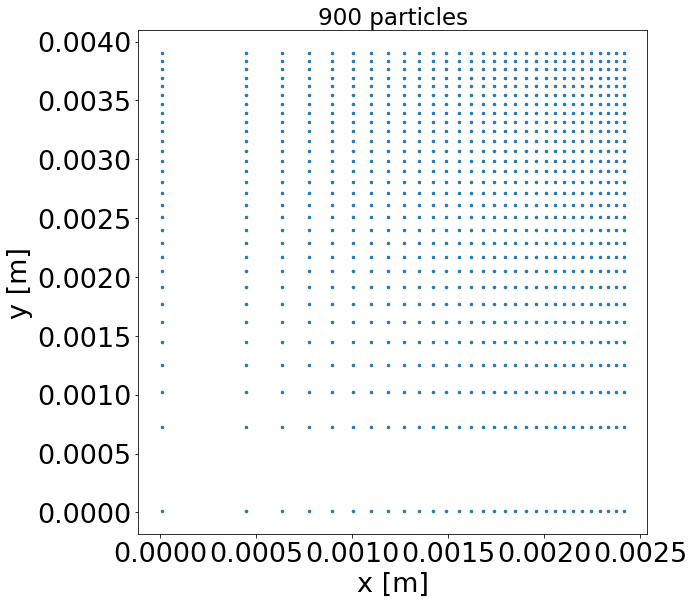

In [15]:
plt.plot(ps.particles[0].x, ps.particles[0].y, '.')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title('{} particles'.format(n_particles))
plt.tight_layout()
savefig = False
if savefig:
    plt.plot('initial_distribution_sixtracklib.png')

### Organise you data
- The tbt data obtained from the simulation are grouped with respect to turns.
- We need to group them in a list for each particle.

In [8]:
x_data = {}
px_data = {}
y_data = {}
py_data = {}
for particle in range(n_particles):
    x_data[particle] = []
    px_data[particle] = []
    y_data[particle] = []
    py_data[particle] = []

In [9]:
# maybe even 100 turns are enough
for particle in range(n_particles):
    for turn in range(n_turns):
        x_data[particle].append(my_dict['x'][turn][particle])
        px_data[particle].append(my_dict['px'][turn][particle])
        y_data[particle].append(my_dict['y'][turn][particle])
        py_data[particle].append(my_dict['py'][turn][particle])

### Compute the tune
- Identify wheather there are any lost particles.
- If not compute the tune (from the tbt data using NAFF)

In [10]:
x_lost_particles = []
Qx_list = []
y_lost_particles = []
Qy_list = []

for particle in range(n_particles):
    if np.isnan(x_data[particle]).any() or np.isnan(px_data[particle]).any():
        x_lost_particles.append(particle)
        print('particle {} lost'.format(particle))
    else:        
        signal_x = x_data[particle]
        Qx_list.append(pnf.get_tune(np.array(signal_x)))
        
    if np.isnan(y_data[particle]).any() or np.isnan(py_data[particle]).any():
        y_lost_particles.append(particle)
        print('particle {} lost'.format(particle))
    else:        
        signal_y = y_data[particle]
        Qy_list.append(pnf.get_tune(np.array(signal_y)))

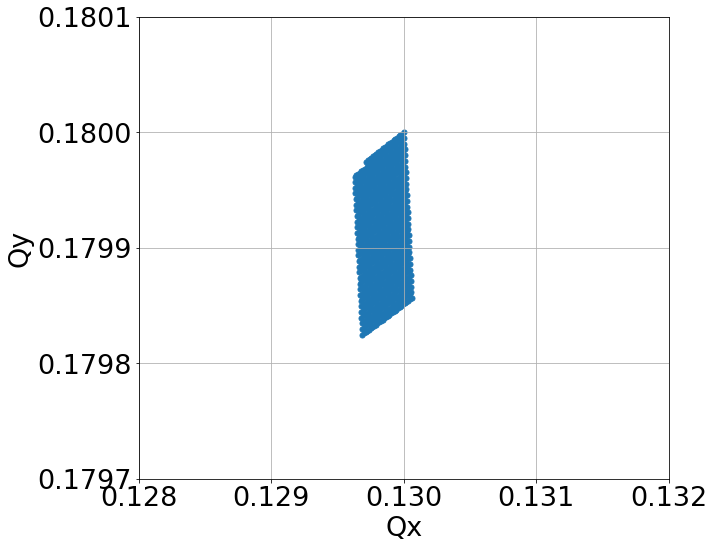

In [13]:
plt.scatter(Qx_list, Qy_list)
plt.ylim(0.1797, 0.1797+0.0004)
plt.xlim(0.128, 0.128+0.004)
plt.grid()
plt.xlabel('Qx')
plt.ylabel('Qy')
savefig = False
if savefig:
    plt.savefig('footprint_sixtracklib.png')

###  Save the tunes in a pickle

In [12]:
my_tunes = {'Qx':Qx_list, 'Qy':Qy_list}
pickle.dump(my_tunes, open('tunes_sixtracklib.pkl', 'wb'))